In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [3]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

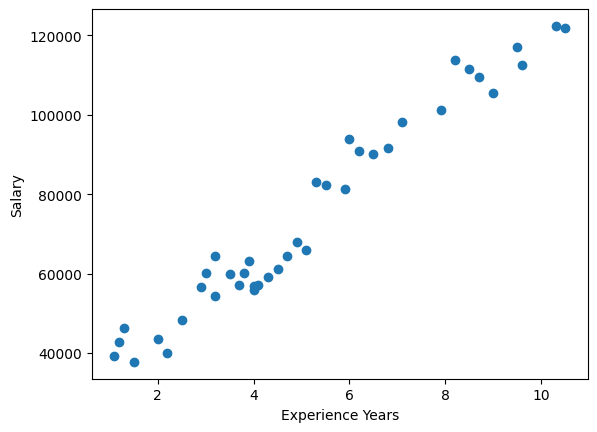

In [5]:
plt.scatter(df['Experience Years'], df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [7]:
x = df[['Experience Years']]
x.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [8]:
y = df[['Salary']]
y.head()

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525


In [9]:
x.mean()

Experience Years    5.1525
dtype: float64

In [10]:
y.mean()

Salary    74743.625
dtype: float64

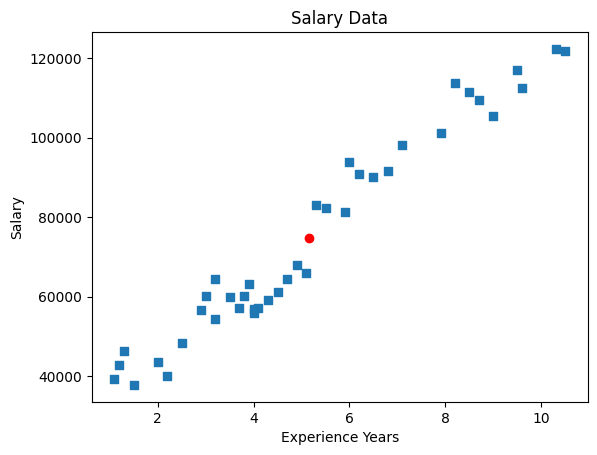

In [11]:
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Experience Years'] , df['Salary'], marker='s')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Salary Data')
plt.show()

In [12]:
reg.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
m = reg.coef_
m

array([[9523.65050742]])

In [14]:
c = reg.intercept_
c

array([25673.01576053])

In [15]:
m * 1.5 + c

array([[39958.49152166]])

In [16]:
reg.predict([[1.5]])

C:\Users\MTBD\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[39958.49152166]])

In [17]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Experience Years,Salary,Predicted_y
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


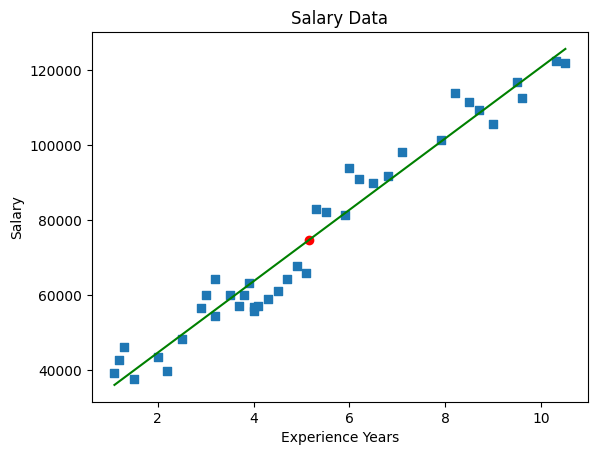

In [18]:
plt.plot(x, reg.predict(x),color='green')
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Experience Years'] , df['Salary'], marker='s')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Salary Data')
plt.show()

Text(0.5, 1.0, 'Salary Data')

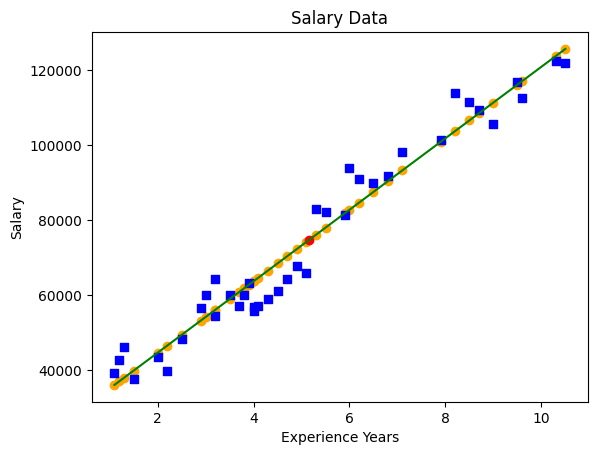

In [19]:
plt.scatter(df['Experience Years'] , reg.predict(x),color='orange')
plt.plot(x, reg.predict(x),color='green')
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Experience Years'] , df['Salary'], marker='s', color='blue')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Salary Data')


In [20]:


df['loss'] = df['Salary'] - df['Predicted_y']
df.head()

,Experience Years,Salary,Predicted_y,loss
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [23]:
mae = mean_absolute_error(df['Salary'], df['Predicted_y'])
mae

4516.281792544623

In [24]:
mse = mean_squared_error(df['Salary'], df['Predicted_y'])
mse

28960383.65377621

In [25]:
#Calculate MAE manualy
sum(abs(df['loss'])) / len(x)

4516.281792544623

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y, reg.predict(x))

0.9558814451799361

In [28]:
#Using score() function
reg.score(x,y)

0.9558814451799361